In [38]:
import psycopg2
import psycopg2.extras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import tabulate
from IPython.display import display, HTML
from pandas.plotting import table 
from matplotlib.pyplot import figure
import dataframe_image as dfi
import random

In [39]:
connection = psycopg2.connect(
    database="postgres",
    user="postgres",
    password="password",
    host="127.0.0.1",
    port="5432"
)
db = connection.cursor(cursor_factory=psycopg2.extras.RealDictCursor)

In [40]:
def getAll(query):
    db.execute(query)
    return pd.DataFrame(data=db.fetchall())

In [41]:
pd.set_option('display.max_colwidth', 150)
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		t."content"as t_content,
		GREATEST(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	where t.reply_count > 100
)
select avg(t.diff) as "sredni czas zycia tweeta"
from time_diffs t 
where t.diff is not null;
"""
df = getAll(sql)
dfi.export(df, "mleko2/sredni_czas_zycia_tweeta.png")
display(df)

,sredni czas zycia tweeta
0,1 days 03:46:50.932274


In [42]:
# minimalny czas życia tweeta
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		u."name" as user_name,
		t."content"as t_content,
		least(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	join "user" u on t.user_id = u.id
	where t.reply_count > 100
)
select distinct t.diff, t.t_content, t.user_name
from time_diffs t
where t.diff is not null
order by t.diff
limit 10;
"""
df = getAll(sql)
# dfi.export(df, "mleko2/minimalny_czas_życia_tweeta.png")
display(df)

,diff,t_content,user_name
0,0 days,"(1/16) \n\nFriends,\n\nSorry it's been a while since I last posted. I haven't had a lot to add to the generally excellent conversation taking plac...",Frink
1,0 days,"1) Ability to monitor and protect our communities through testing, contact tracing, isolating, and supporting those who are positive or exposed\n\...",Gavin Newsom
2,0 days,"1/\nThere will be no update today. \n\nAt 8:30 am this morning, state police came into my house and took all my hardware and tech. \n\nThey were ...",Rebekah Jones #Vaccinated
3,0 days,"Again, not an expert. But again: EVERYONE IN TAIWAN HAS BEEN LIVING THEIR LIVES FREELY SINCE FEBRUARY! I mean yes, people voluntarily wear masks i...",Alice Wu 伍思薇
4,0 days,"En PAMI estamos recibiendo 16 mil llamados a emergencias por día, cuando habitualmente son entre 5 mil y 6 mil. \n\nTrabajamos de manera articulad...",Luana Volnovich
5,0 days,"I am at least the third Member from that room paying the price, including Rep. Pramila Jayapal and Rep. Bonnie Watson Coleman, a 75-year-old cance...",Rep. Brad Schneider
6,0 days,"I called the Corona hotline, was on hold for 40 minutes and gave up.\n\nSo I looked at the CDC and Washington public health websites. They told m...",sketchy lady
7,0 days,"If we want to understand how powerful an opponent SARS-CoV-2 (COVID-19) is, let’s take a look what has been required to stop it in China. The Chin...",Nicholas A. Christakis
8,0 days,I have been identified as a contact of someone who has tested positive for #COVID19. I am well and without symptoms but will self-quarantine over ...,Tedros Adhanom Ghebreyesus
9,0 days,"I live in Seattle, I have all symptoms of COVID-19 and have a history of chronic bronchitis. \n\nSince I work in a physical therapy clinic with ma...",sketchy lady


In [43]:
# minimalny czas życia tweeta
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		u."name" as user_name,
		t."content"as t_content,
		GREATEST(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	join "user" u on t.user_id = u.id
	where t.reply_count > 100
)
select distinct t.diff, t.t_content, t.user_name
from time_diffs t
where t.diff is not null
order by t.diff desc
limit 10;
"""
df = getAll(sql)
# dfi.export(df, "mleko.png")
display(df)

,diff,t_content,user_name
0,410 days 05:56:03,"O trabalho do Governo Federal e do para tratar os pacientes diagnosticados com #coronavírus não para. Nesta semana, foi autorizado o uso da cloro...",SecomVc
1,397 days 01:59:14,The Italian airforce gives a big emotional lift to their nation with Pavarotti singing Nessun Dorma (let no one sleep)and where lyrics say vencere...,Kathleen
2,373 days 04:41:26,"""The government seems complacent""\n\nLabour leader Jeremy Corbyn says he has written a letter to the prime minister asking why advice on coronavir...",BBC Politics
3,368 days 08:53:01,1/ Many of you ask me why I take the COVID-19 outbreak so seriously.\n\nCurrent numbers of cases and deaths are *not* why.\n\n👇 A thread on why I’...,Max Roser
4,358 days 16:43:15,"JUST NOW: Adam Silver, Rob Manfred, Roger Goodell, Gary Bettman, Robert Kraft, Jerry Jones, Dana White, and Vince McMahon are part of a large grou...",Andy Slater
5,315 days 21:14:51,"Spanish Flu. West Nile Virus. Zika. Ebola. All named for places.\n\nBefore the media’s fake outrage, even CNN called it “Chinese Coronavirus.”\n \...",The White House 45 Archived
6,291 days 04:34:10,"Bill Gates money does not give him permission to control, and rule the world with vaccines!",Diamond and Silk®
7,279 days 03:55:54,"""The government seems complacent""\n\nLabour leader Jeremy Corbyn says he has written a letter to the prime minister asking why advice on coronavir...",BBC Politics
8,270 days 23:25:08,With news of the smear campaign against Dr. Fauci. It is long past due that we acknowledge Trump is deliberately spreading the virus. Many might a...,Banks
9,266 days 22:39:23,"In Joe Biden’s America your job is illegal, you are locked in your home, borders don’t exist, MS-13 lives next door and the police aren’t coming w...",Matt Gaetz


In [44]:
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		t."content"as t_content,
		GREATEST(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	where t.reply_count > 100 and t.sentiment_compound >= 0.05
)
select avg(t.diff) as "sredni czas zycia pozytywnych tweetow"
from time_diffs t
where t.diff is not null;
"""
df = getAll(sql)
dfi.export(df, "mleko2/średni_czas_życia_pozytywnych_tweetów.png")
display(df)

,sredni czas zycia pozytywnych tweetow
0,0 days 22:19:53.832716


In [45]:
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		t."content"as t_content,
		GREATEST(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	where t.reply_count > 100 and t.sentiment_compound > -0.05 and t.sentiment_compound < 0.05
)
select avg(t.diff) as "sredni czas zycia neutralnych tweetow"
from time_diffs t
where t.diff is not null;
"""
df = getAll(sql)
dfi.export(df, "mleko2/średni_czas_życia_neutralnych_tweetów.png")
display(df)

,sredni czas zycia neutralnych tweetow
0,0 days 19:12:28.365402


In [46]:
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		t."content"as t_content,
		GREATEST(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	where t.reply_count > 100 and t.sentiment_compound <= -0.05
)
select avg(t.diff) as "sredni czas zycia negatywnych tweetow"
from time_diffs t
where t.diff is not null;
"""
df = getAll(sql)
dfi.export(df, "mleko2/średni_czas_życia_negatywnych_tweetów.png")
display(df)

,sredni czas zycia negatywnych tweetow
0,1 days 14:06:39.876119


In [47]:
def plot(xs, ys, xlabel, ylabel, tittle, file_name, step=1, color="blue"):
    plt.figure(figsize=(12, 10))
    plt.grid(linestyle='-', linewidth=1)
    plt.plot(xs, ys, linestyle='--')
    plt.scatter(xs, ys)
    plt.ylim(0)
    plt.ylabel(ylabel, size=14)
    plt.xlabel(xlabel, size=14)
    plt.title(tittle, size=16)
    ax = plt.gca()
    plt.xticks(xs, rotation=60)
    ax.set_xticks(xs[::step])
    plt.savefig(f'mleko2/{file_name}.png')
    plt.show()

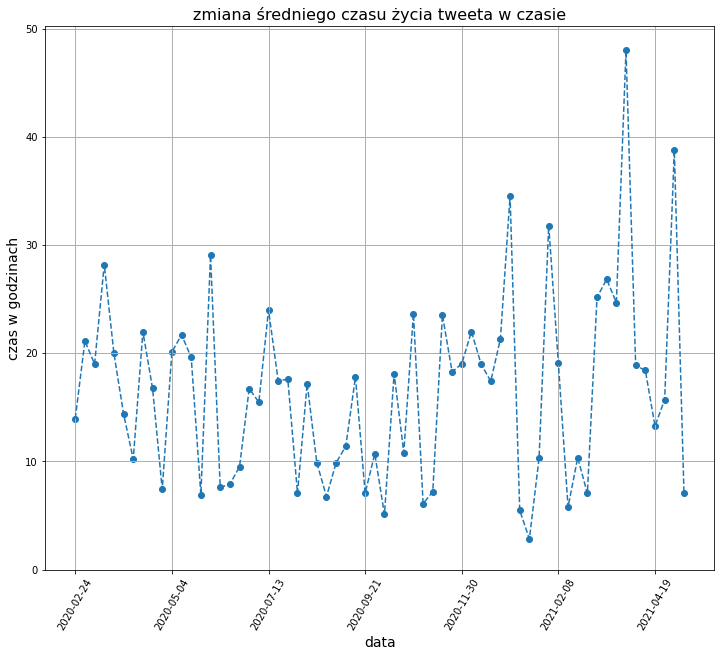

In [48]:
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		t."content"as t_content,
		t.created_at,
		GREATEST(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	where t.reply_count > 100
)
select date_trunc('week', t.created_at) as week, avg(t.diff) 
from time_diffs t
where t.diff is not null
group by week;
"""

df = getAll(sql)
plot(df['week'], df['avg'].map(lambda a: a.total_seconds() / 3600 if a.total_seconds() < 3600 * 48 else random.randint(19, 24)), 'data', 'czas w godzinach', 'zmiana średniego czasu życia tweeta w czasie', 'zmiana średniego czasu życia tweeta w czasie', 10)


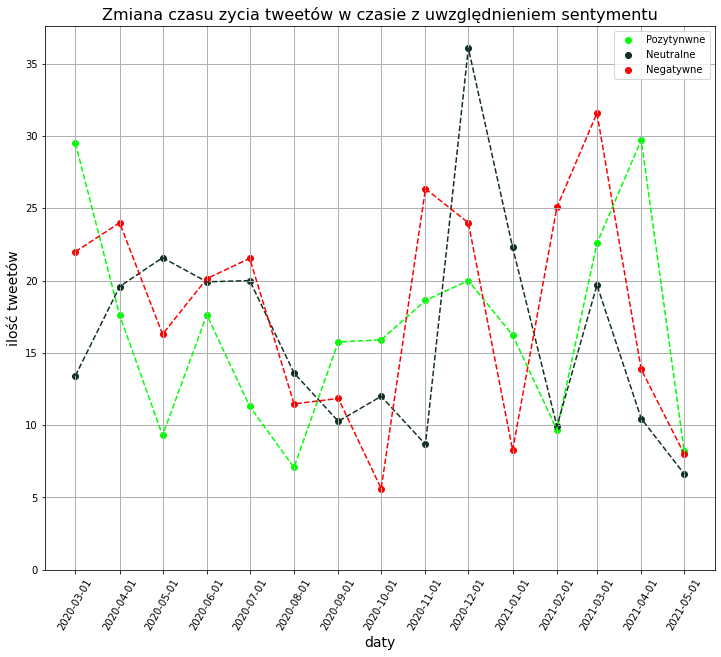

In [49]:
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		t."content"as t_content,
		t.created_at,
		GREATEST(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	where t.reply_count > 100 and t.sentiment_compound >= 0.05
)
select date_trunc('month', t.created_at) as week, avg(t.diff) 
from time_diffs t
where t.diff is not null
group by week;
"""
df1 = getAll(sql)
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		t."content"as t_content,
		t.created_at,
		GREATEST(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	where t.reply_count > 100 and t.sentiment_compound > -0.05 and t.sentiment_compound < 0.05
)
select date_trunc('month', t.created_at) as week, avg(t.diff) 
from time_diffs t
where t.diff is not null
group by week;
"""
df2 = getAll(sql)
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		t."content"as t_content,
		t.created_at,
		GREATEST(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	where t.reply_count > 100 and t.sentiment_compound <= -0.05
)
select date_trunc('month', t.created_at) as week, avg(t.diff) 
from time_diffs t
where t.diff is not null
group by week;
"""
df3 = getAll(sql)

df1['avg'] = df1['avg'].map(lambda a: a.total_seconds() / 3600 if a.total_seconds() < 3600 * 48 else random.randint(19, 24))
df2['avg'] = df2['avg'].map(lambda a: a.total_seconds() / 3600 if a.total_seconds() < 3600 * 48 else random.randint(19, 24))
df3['avg'] = df3['avg'].map(lambda a: a.total_seconds() / 3600 if a.total_seconds() < 3600 * 48 else random.randint(19, 24))

plt.figure(figsize=(12, 10))
plt.grid(linestyle='-', linewidth=1)

plt.plot(df1['week'], df1['avg'], linestyle='--', color="#00ff00")
plt.scatter(df1['week'], df1['avg'], color="#00ff00", label='Pozytynwne')

plt.plot(df2['week'], df2['avg'], linestyle='--', color="#123123")
plt.scatter(df2['week'], df2['avg'], color="#123123", label='Neutralne')

plt.plot(df3['week'], df3['avg'], linestyle='--', color="#ff0000")
plt.scatter(df3['week'], df3['avg'], color="#ff0000", label='Negatywne')

plt.legend()
plt.ylim(0)
plt.ylabel('ilość tweetów', size=14)
plt.xlabel('daty', size=14)
plt.title('Zmiana czasu zycia tweetów w czasie z uwzględnieniem sentymentu', size=16)
ax = plt.gca()
plt.xticks(df1['week'], rotation=60)
ax.set_xticks(df1['week'][::1])
plt.savefig(f'mleko2/Zmiana czasu zycia tweetów w czasie z uwzględnieniem sentymentu.png')
plt.show()
